In [ ]:
import pandas as pd 
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import pyplot
import seaborn as sns
import warnings
warnings.filterwarnings(action='ignore')

In [ ]:
pip install openpyxl==3.0.9

# Preprocessing Data

In [ ]:
data = pd.read_excel('NGA_Data_Full.xlsx')
data['log(PGA)']= np.log10(data['PGA'])
data['log(Rrup)']= np.log10(data['Rrup'])
data['log(Vs30)']= np.log10(data['Vs30'])
#data['Mw2']= np.power((data['Mw']),2)
#con=data['FM']==1
#tt=data[con]
data.head(10)

,PGA,PGV,Mw,FM,Vs30,Rrup,log(PGA),log(Rrup),log(Vs30)
0,0.052746,8.5444,7.36,3,316.46,117.75,-1.277810,2.070961,2.500319
1,0.058666,7.1982,6.19,1,408.93,17.64,-1.231614,1.246499,2.611649
2,0.378930,23.5450,6.19,1,289.56,9.58,-0.421441,0.981366,2.461739
3,0.247240,11.6330,6.19,1,256.82,12.90,-0.606881,1.110590,2.409629
4,0.287260,16.5210,6.19,1,527.92,15.96,-0.541725,1.203033,2.722568
5,0.067895,3.7417,5.33,3,477.22,22.94,-1.168162,1.360593,2.678719
6,0.166890,5.0801,5.33,3,667.13,20.24,-0.777570,1.306211,2.824210
7,0.031274,5.5043,6.61,3,280.56,55.20,-1.504817,1.741939,2.448026
8,0.071213,4.7830,6.61,3,235.00,61.79,-1.147441,1.790918,2.371068
9,0.286720,22.1830,6.61,3,450.28,22.63,-0.542542,1.354685,2.653483


In [ ]:
X = data.drop(['PGA','Rrup','Vs30', 'log(PGA)', 'PGV'], axis=1)
y=data['log(PGA)']
Y=pd.DataFrame(y)
X.head()

,Mw,FM,log(Rrup),log(Vs30)
0,7.36,3,2.070961,2.500319
1,6.19,1,1.246499,2.611649
2,6.19,1,0.981366,2.461739
3,6.19,1,1.110590,2.409629
4,6.19,1,1.203033,2.722568


**Statistics of Independant Variables (X1, X2,..)**




In [ ]:
X.describe()

,Mw,FM,log(Rrup),log(Vs30)
count,13555.000000,13555.000000,13555.000000,13555.000000
mean,5.079011,1.772704,1.812515,2.630959
std,1.350045,0.942915,0.394672,0.169881
min,3.050000,1.000000,-1.301030,1.950949
25%,3.900000,1.000000,1.577262,2.525725
50%,4.600000,1.000000,1.845470,2.613387
75%,6.300000,3.000000,2.083735,2.748676
max,7.900000,3.000000,2.698570,3.304519


**Corelation Coefficients Heatmap**

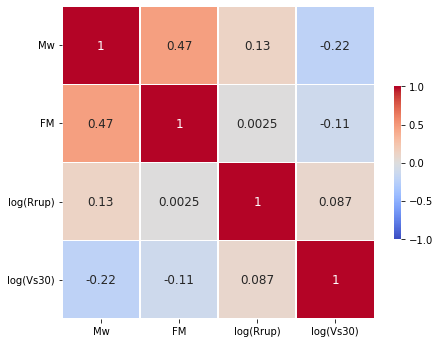

In [ ]:
corr_matrix = X.corr()

f, ax = plt.subplots(figsize=(7,7)) 
heatmap = sns.heatmap(corr_matrix, 
                      square = True,
                      linewidths = .5,
                      cmap = 'coolwarm',
                      cbar_kws = {'shrink': .4, 
                                'ticks' : [-1, -.5, 0, 0.5, 1]},
                      vmin = -1, 
                      vmax = 1,
                      annot = True,
                      annot_kws = {"size": 12})

ax.set_yticklabels(corr_matrix.columns, rotation = 0)
ax.set_xticklabels(corr_matrix.columns)
sns.set_style({'xtick.bottom': True}, {'ytick.left': True})

plt.savefig("Corelation Matrix.jpeg")

**Train-Test Split**

In [ ]:
from sklearn.model_selection import train_test_split
xtrain, xtest, ytrain, ytest = train_test_split(X, Y, test_size=0.3)

**Normalization**

In [ ]:
#from sklearn.preprocessing import MinMaxScaler
#norm = MinMaxScaler().fit(xtrain)
#xtrain_norm = norm.transform(xtrain)
#xtest_norm = norm.transform(xtest)

**Standardization**

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
xtrain = sc_x.fit_transform(xtrain) 
xtest = sc_x.transform(xtest)

In [ ]:
xtrain.size

37952

# Model Development: RBF Kernel


In [ ]:
from sklearn.svm import SVR
svrbf = SVR(kernel='rbf')
svrbf.fit(xtrain, ytrain)
print("Model developed successfully")

Model developed successfully


# Evaluating Model Performance

**Coefficient of Determination**

In [ ]:
ypred = svrbf.predict(xtest)
ypred

array([-4.13810115, -3.55708845, -1.06519221, ..., -3.46101888,
       -1.65086989, -2.93342001])

In [ ]:
svrbf.support_vectors_.size

28304

In [ ]:
from sklearn import metrics
R2= metrics.r2_score(ytest, ypred)
print("Coefficient of Determination is:", R2)

Coefficient of Determination is: 0.9003802442689053


**Mean and Standard Deviation of Residuals**

In [ ]:
from array import array 
res_pred = array("f", ypred)

ytest= ytest.to_numpy()

from array import array
res = array("f", ytest)

In [ ]:
diff = np.subtract(res_pred, res) 
ss= np.mean(diff)
print("Mean of Residuals is:", ss)

Mean of Residuals is: 0.007833696


In [ ]:
import math
RSS = np.sum(np.square(diff))
RSE = math.sqrt(RSS / (len(diff) - 1))
print("Standard Deviation is:", RSE)

Standard Deviation is: 0.33615784383334407


In [ ]:
from sklearn import metrics
import math
MS= metrics.mean_squared_error(ytest, ypred)
print("Mean Squared Error is:", MS)

Mean Squared Error is: 0.11297431282134825


In [ ]:
Residuals_df1=pd.DataFrame(diff)
Residuals_df1.describe()
Residuals_df1.rename( columns={0 :'Residuals'}, inplace=True )
Residuals_df1.describe(include = 'all')

,Residuals
count,4067.000000
mean,0.007834
std,0.336066
min,-1.484628
25%,-0.208714
50%,0.007454
75%,0.224091
max,1.341923


# Total

In [ ]:
from sklearn.preprocessing import StandardScaler
sc_x = StandardScaler()
X = sc_x.fit_transform(X) 

In [ ]:
ypred_all = svrbf.predict(X)
#ypred_all

from array import array 
ypred_array_all = array("f", ypred_all)
ypred_array_all

array('f', [-1.3697961568832397, -0.8110711574554443, -0.608009934425354, -0.677265465259552, -0.7723212242126465, -1.2233527898788452, -1.2646540403366089, -1.0882469415664673, -1.1270354986190796, -0.7031942009925842, -0.9267264604568481, -1.7257320880889893, -1.9264178276062012, -0.6853095293045044, -0.8041354417800903, -0.6606782674789429, -0.8130592703819275, -0.7538992166519165, -0.2174631506204605, -0.8536949753761292, -1.0754433870315552, -1.1704977750778198, -1.171793818473816, -1.6620994806289673, -0.9311339259147644, -1.3172812461853027, -1.2446867227554321, -0.950290322303772, -1.3209340572357178, -1.3247348070144653, -0.8141512870788574, -1.6986685991287231, -1.0736993551254272, -1.4913618564605713, -2.139458179473877, -2.0866212844848633, -1.2340110540390015, -0.9138413071632385, -1.3553985357284546, -1.524768590927124, -0.5418165326118469, -0.703119158744812, -0.8896724581718445, -1.056097388267517, -0.5243111848831177, -1.1860522031784058, -0.6165755987167358, -0.735465

In [ ]:
Y= Y.to_numpy()
#type(Y)

In [ ]:
from array import array
Y_all = array("f", Y)
Y_all

array('f', [-1.2778104543685913, -1.2316135168075562, -0.4214410185813904, -0.6068812608718872, -0.5417248606681824, -1.168162226676941, -0.7775697112083435, -1.5048165321350098, -1.1474406719207764, -0.542542040348053, -1.0275287628173828, -1.4353575706481934, -2.05769419670105, -0.6629602313041687, -0.9269051551818848, -0.4931703805923462, -0.7480942010879517, -0.813976526260376, 0.08696457743644714, -0.9152092933654785, -0.8819006681442261, -1.5748082399368286, -1.2235603332519531, -1.4179821014404297, -0.729367733001709, -1.189397931098938, -1.5525628328323364, -0.9500071406364441, -1.3136765956878662, -0.9776128530502319, -1.08513343334198, -0.7991768717765808, -1.045540452003479, -0.8244011998176575, -1.5215922594070435, -1.0899842977523804, -1.530295729637146, -1.1593043804168701, -1.2352337837219238, -1.4479038715362549, -0.48826366662979126, -1.3380359411239624, -1.0137165784835815, -1.2621556520462036, -0.9565198421478271, -1.612592339515686, -0.6488223671913147, -0.939717769

In [ ]:
diffT = np.subtract(ypred_array_all, Y_all) 

In [ ]:
import math
RSST = np.sum(np.square(diffT))
RSET = math.sqrt(RSST / (len(Y) - 1))
print("Standard Deviation is:", RSET)

Standard Deviation is: 0.3357388922486872


**Statistics of Residuals**

In [ ]:
Residuals_df2=pd.DataFrame(diffT)
Residuals_df2.rename( columns={0 :'Residuals'}, inplace=True )
Residuals_df2.describe(include = 'all')

,Residuals
count,13555.000000
mean,0.003771
std,0.335717
min,-1.485462
25%,-0.208008
50%,0.002820
75%,0.209234
max,1.593473


# Calculation of Parameters

**Mean and SD of Training Outputs**

In [ ]:
ypred = svrbf.predict(xtest)
ypred_train= svrbf.predict(xtrain)

In [ ]:
import numpy as np
mean= np.mean(ypred_train)
std= np.std(ypred_train)
print("Mean and SD of training output is", mean, "and", std, "respectively")  

Mean and SD of training output is -2.361027030642454 and 1.0152320481267778 respectively


**Cost Parameter, C**

In [ ]:
C= max(abs(mean+(3*std)), abs(mean-(3*std)))
print("Cost Parameter is", C)

Cost Parameter is 5.406723175022787


**Kernel Parameter, Gamma**

In [ ]:
r=2
n= 4
p= r*((0.3)**(1/n))
gamma= 1/(2*(p**2))
print("Kernel Parameter is",gamma)

Kernel Parameter is 0.22821773229381923


**Tolerance Parameter, Epsilon**

In [ ]:
eps= 3*RSE*math.sqrt((np.log(len(Y)))/len(Y))
print("Tolerance Prameter is ",eps)

Tolerance Prameter is  0.02671824783827502


# **Plots**

In [ ]:
Residuals_df2=pd.DataFrame(diffT)
Residuals_df2.rename( columns={0 :'Residuals'}, inplace=True)

In [ ]:
data_plot = pd.read_excel('NGA_Data_Full.xlsx')
data_plot['logPGA']= np.log10(data_plot['PGA'])
data_plot['logRrup']= np.log10(data_plot['Rrup'])
data_plot['logVs30']= np.log10(data_plot['Vs30'])

X_plot = data_plot.drop(['PGA', 'logPGA', 'PGV'], axis=1)
pga_series=data_plot['logPGA']
Y_plot=pd.DataFrame(pga_series)
Y_plot

,logPGA
0,-1.277810
1,-1.231614
2,-0.421441
3,-0.606881
4,-0.541725
...,...
13550,-2.298458
13551,-3.307232
13552,-2.529884
13553,-2.798494


In [ ]:
X_plot.describe()

,Mw,FM,Vs30,Rrup,logRrup,logVs30
count,13555.000000,13555.000000,13555.000000,13555.000000,13555.000000,13555.000000
mean,5.079011,1.772704,462.134077,92.194495,1.812515,2.630959
std,1.350045,0.942915,193.708534,76.530904,0.394672,0.169881
min,3.050000,1.000000,89.320000,0.050000,-1.301030,1.950949
25%,3.900000,1.000000,335.525000,37.780000,1.577262,2.525725
50%,4.600000,1.000000,410.570000,70.060000,1.845470,2.613387
75%,6.300000,3.000000,560.630000,121.265000,2.083735,2.748676
max,7.900000,3.000000,2016.130000,499.540000,2.698570,3.304519


**Magnitude-Distance Distribution of the Ground Motion Records**

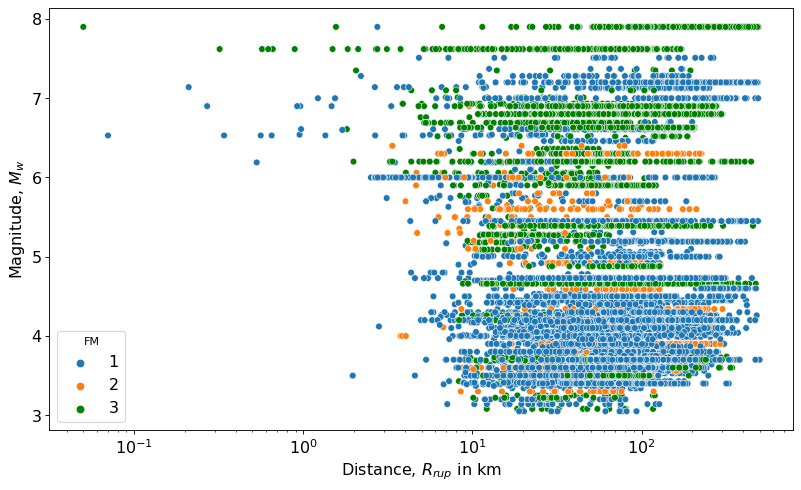

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import seaborn as sns
plt.figure(figsize=(12,7), dpi=80)
sns.scatterplot(X_plot['Rrup'],X_plot['Mw'], hue=X_plot['FM'], palette=["C0", "C1", "g"]) 
plt.xlabel('Distance, $R_{rup}$ in km')
plt.ylabel('Magnitude, $M_w$')
#plt.title('Magnitude vs Rrup')
plt.xscale("log")

plt.savefig("Mw_vs_$R_{rup}$.jpeg")

**Residual Plot w.r.t Magnitude**

In [ ]:
RvsM = pd.DataFrame(zip(Residuals_df2.Residuals, X_plot.Mw))
RvsM.rename( columns={0 :'Residuals',1 :'Magnitude' }, inplace=True )

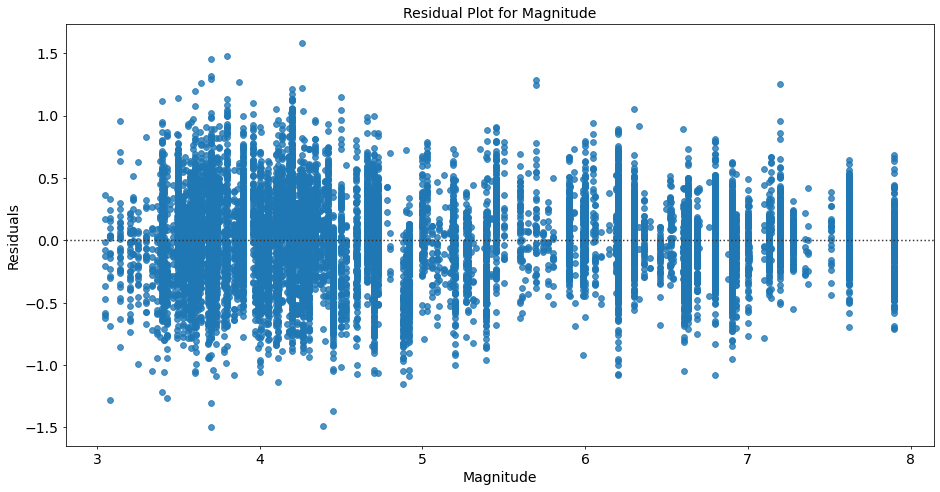

In [ ]:
plt.figure(figsize=(16,8), dpi=70)
sns.residplot(y="Residuals", x="Magnitude", data=RvsM)
plt.title("Residual Plot for Magnitude")
plt.grid(False)
#plt.show()

plt.savefig("Residual_Mw.jpeg")

**Residual Plot w.r.t Distance**

In [ ]:
RvsRrup = pd.DataFrame(zip(Residuals_df2.Residuals, X_plot.Rrup))
RvsRrup.rename( columns={0 :'Residuals',1 :'Distance' }, inplace=True )

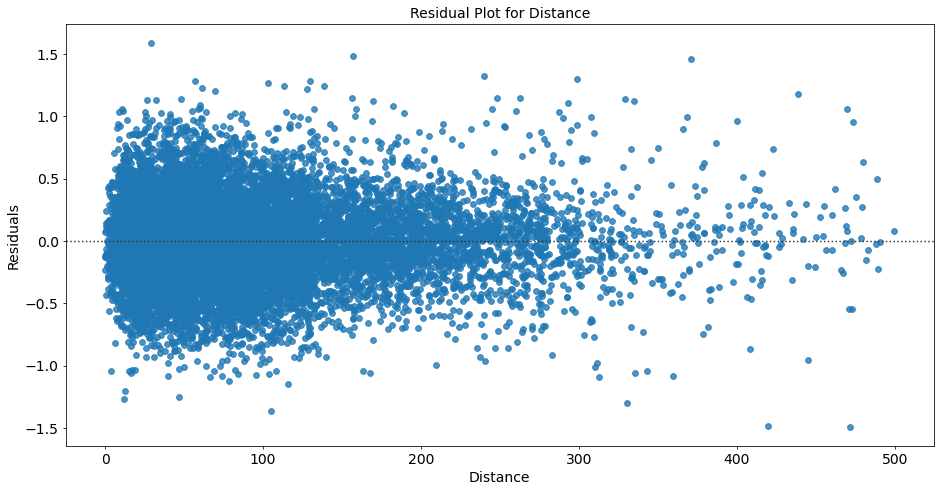

In [ ]:
plt.figure(figsize=(16,8), dpi=70)
sns.residplot(y="Residuals", x="Distance", data=RvsRrup)
plt.title("Residual Plot for Distance")
plt.grid(False)
#plt.show()

plt.savefig("Residual_Rrup.jpeg")

**Residual Plot w.r.t Vs30**

In [ ]:
RvsVs30 = pd.DataFrame(zip(Residuals_df2.Residuals, X_plot.Vs30))
RvsVs30.rename( columns={0 :'Residuals',1 :'Vs30' }, inplace=True)

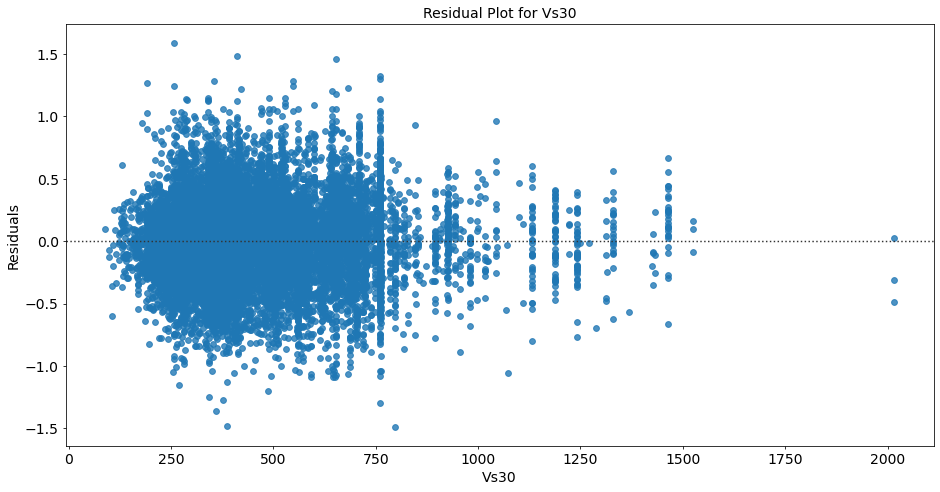

In [ ]:
plt.figure(figsize=(16,8), dpi=70)
sns.residplot(y="Residuals", x="Vs30", data=RvsVs30)
plt.title("Residual Plot for Vs30")
plt.grid(False)
#plt.show()

plt.savefig("Residual_Vs30.jpeg")

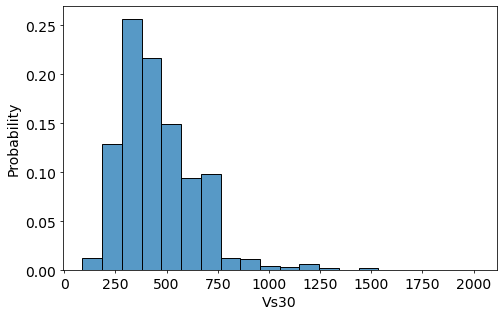

In [ ]:
plt.figure(figsize=(8,5), dpi=70)
sns.histplot(data = X_plot, x = "Vs30", stat="probability", bins= 20)
plt.ylabel('Probability')
plt.xlabel('Vs30')

plt.savefig("Vs30.jpeg")

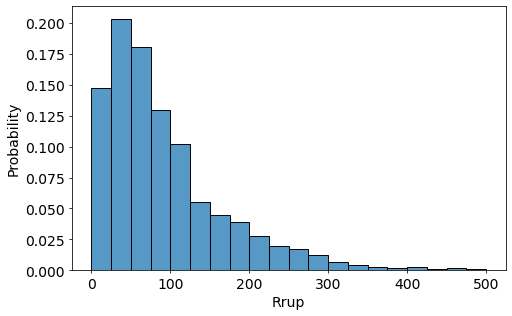

In [ ]:
plt.figure(figsize=(8,5), dpi=70)
sns.histplot(data = X_plot, x = "Rrup", stat="probability", bins= 20)
plt.ylabel('Probability')
plt.xlabel('Rrup')

plt.savefig("Rrup.jpeg")

Text(0.5, 0, 'Rrup')

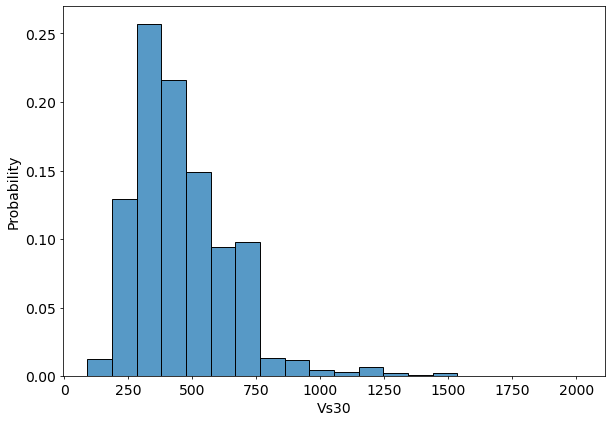

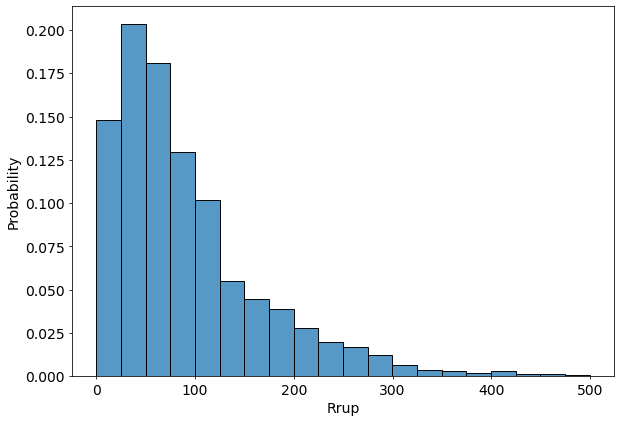

In [ ]:
plt.figure(figsize=(10,7), dpi=70)
sns.histplot(data = X_plot, x = "Vs30", stat="probability", bins= 20)
plt.ylabel('Probability')
plt.xlabel('Vs30')


plt.figure(figsize=(10,7), dpi=70)
sns.histplot(data = X_plot, x = "Rrup", stat="probability", bins= 20)
plt.ylabel('Probability')
plt.xlabel('Rrup')


Text(0.5, 0, 'Rrup')

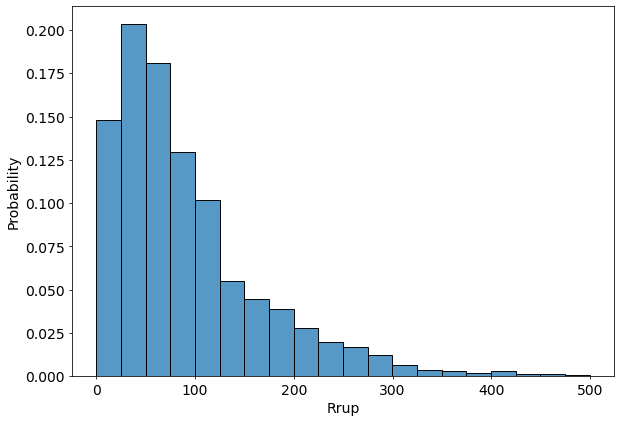

In [ ]:
plt.figure(figsize=(10,7), dpi=70)
sns.histplot(data = X_plot, x = "Rrup", stat="probability", bins= 20)
plt.ylabel('Probability')
plt.xlabel('Rrup')

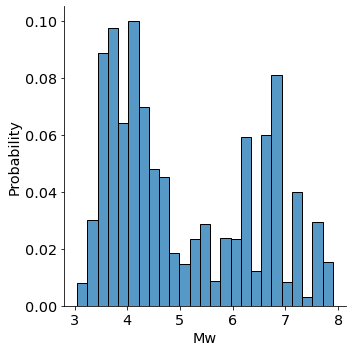

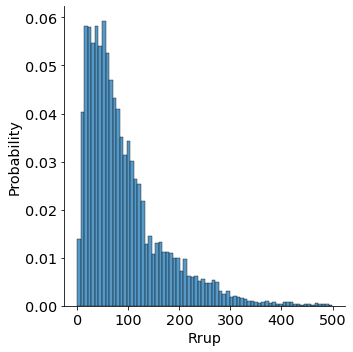

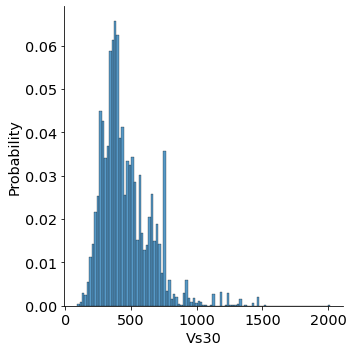

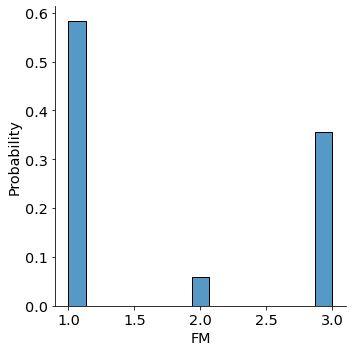

In [ ]:
para = [['Mw', 'Rrup'], ['Vs30', 'FM']]
for i in range(0,2):
  for j in range(0,2):
      sns.displot(X_plot, x=para[i][j], stat="probability")
plt.savefig("Probability.jpeg")        

**Adding Soil Class as a column**

In [ ]:
data_plot = pd.read_excel('NGA_Data_Full.xlsx')
data_plot['logPGA']= np.log10(data_plot['PGA'])
data_plot['logRrup']= np.log10(data_plot['Rrup'])
data_plot['logVs30']= np.log10(data_plot['Vs30'])

In [ ]:
X_plot = data_plot.drop(['PGA', 'logPGA', 'PGV'], axis=1)
pga_series=data_plot['logPGA']
Y_plot=pd.DataFrame(pga_series)
X_plot['Soil Class']=''

In [ ]:
X_plot.loc[X_plot['Vs30']>1500.0, 'Soil Class'] = 'A'
X_plot.loc[(X_plot['Vs30']>760.0) & (X_plot['Vs30']<1500.0), 'Soil Class'] = 'B'
X_plot.loc[(X_plot['Vs30']>360.0) & (X_plot['Vs30']<760.0), 'Soil Class'] = 'C'
X_plot.loc[(X_plot['Vs30']>180.0) & (X_plot['Vs30']<360.0), 'Soil Class'] = 'D'
X_plot.loc[X_plot['Vs30']<180.0, 'Soil Class'] = 'E'
X_plot.head()

,Mw,FM,Vs30,Rrup,logRrup,logVs30,Soil Class
0,7.36,3,316.46,117.75,2.070961,2.500319,D
1,6.19,1,408.93,17.64,1.246499,2.611649,C
2,6.19,1,289.56,9.58,0.981366,2.461739,D
3,6.19,1,256.82,12.90,1.110590,2.409629,D
4,6.19,1,527.92,15.96,1.203033,2.722568,C


# **log(PGA) vs Rrup, for different values of Vs30**

In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array1 = [[0]*my_cols]*my_rows
my_array1= np.array(my_array1, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array1[i][j]=6
    elif j==1:
      my_array1[i][j]=1
    elif j==2:
      my_array1[i][j]=np.log10(i+2)
    else:
        my_array1[i][j]=3.0530
 


In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array2 = [[0]*my_cols]*my_rows

import numpy as np
my_array2= np.array(my_array2, dtype=float)


for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array2[i][j]=6
    elif j==1:
      my_array2[i][j]=1
    elif j==2:
      my_array2[i][j]=np.log10(i+2)
    else:
        my_array2[i][j]=2.7481 

In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array3 = [[0]*my_cols]*my_rows

import numpy as np
my_array3= np.array(my_array3, dtype=float)


for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array3[i][j]=6
    elif j==1:
      my_array3[i][j]=1
    elif j==2:
      my_array3[i][j]=np.log10(i+2)
    else:
        my_array3[i][j]=2.4313


In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array4 = [[0]*my_cols]*my_rows

import numpy as np
my_array4= np.array(my_array4, dtype=float)


for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array4[i][j]=6
    elif j==1:
      my_array4[i][j]=1
    elif j==2:
      my_array4[i][j]=np.log10(i+2)
    else:
        my_array4[i][j]=2

In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array5 = [[0]*my_cols]*my_rows
my_array5= np.array(my_array5, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array5[i][j]=6
    elif j==1:
      my_array5[i][j]=1
    elif j==2:
      my_array5[i][j]=np.log10(i+2)
    else:
        my_array5[i][j]=3.3

In [ ]:
pred1 = svrbf.predict(my_array1)
pred2 = svrbf.predict(my_array2)
pred3 = svrbf.predict(my_array3)
pred4 = svrbf.predict(my_array4)
pred5 = svrbf.predict(my_array5)

In [ ]:
xdf1=pd.DataFrame(my_array1)
xdf1.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup1', 3: 'logVs30'}, inplace=True )

xdf2=pd.DataFrame(my_array2)
xdf2.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

xdf3=pd.DataFrame(my_array3)
xdf3.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

xdf4=pd.DataFrame(my_array4)
xdf4.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

xdf5=pd.DataFrame(my_array5)
xdf5.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

In [ ]:
pdf1=pd.DataFrame(pred1)
pdf1.rename( columns={0 :'logPGA'}, inplace=True )
pdf1['PGA']= 10**pdf1['logPGA']

pdf2=pd.DataFrame(pred2)
pdf2.rename( columns={0 :'logPGA'}, inplace=True )
pdf2['PGA']= 10**pdf2['logPGA']

pdf3=pd.DataFrame(pred3)
pdf3.rename( columns={0 :'logPGA'}, inplace=True )
pdf3['PGA']= 10**pdf3['logPGA']

pdf4=pd.DataFrame(pred4)
pdf4.rename( columns={0 :'logPGA'}, inplace=True )
pdf4['PGA']= 10**pdf4['logPGA']

pdf5=pd.DataFrame(pred5)
pdf5.rename( columns={0 :'logPGA'}, inplace=True )
pdf5['PGA']= 10**pdf5['logPGA']

In [ ]:
r= np.arange(0,500)
rdf=pd.DataFrame(r)
rdf.rename( columns={0 :'Rrup'}, inplace=True )

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import seaborn as sns
plt.figure(figsize=(16,8), dpi=80)
sns.lineplot(rdf['Rrup'],pdf5['PGA'], label='Class A')
sns.lineplot(rdf['Rrup'],pdf1['PGA'], label='Class B')
sns.lineplot(rdf['Rrup'],pdf2['PGA'], label='Class C') #hue=X_new['Mw']) 
sns.lineplot(rdf['Rrup'],pdf3['PGA'], label='Class D') 
sns.lineplot(rdf['Rrup'],pdf4['PGA'], label='Class E') 
plt.xlabel('Distance, Rrup in km')
plt.ylabel('PGA (g)')
plt.title('PGA vs Rrup, for different Vs30')
plt.xscale("log")
plt.yscale("log")
#plt.savefig("PGA_Rrup_Mw.jpeg")
fontsize = 13
legend=plt.legend(title='Soil Class', loc="upper right", frameon=True, fontsize=fontsize)
legend.get_title().set_fontsize('15')

plt.savefig("For different Vs30_updated.jpeg")

# **log(PGA) vs Rrup, for different values of Magnitude**

In [ ]:
from array import array
my_rows, my_cols = (500, 4)
my_array1 = [[0]*my_cols]*my_rows
my_array1= np.array(my_array1, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array1[i][j]=4
    elif j==1:
      my_array1[i][j]=1
    elif j==2:
      my_array1[i][j]=np.log10(i+2)
    else:
        my_array1[i][j]=3

my_array2 = [[0]*my_cols]*my_rows
my_array2= np.array(my_array2, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array2[i][j]=5
    elif j==1:
      my_array2[i][j]=1
    elif j==2:
      my_array2[i][j]=np.log10(i+2)
    else:
        my_array2[i][j]=3

my_array3 = [[0]*my_cols]*my_rows
my_array3= np.array(my_array3, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array3[i][j]=6
    elif j==1:
      my_array3[i][j]=1
    elif j==2:
      my_array3[i][j]=np.log10(i+2)
    else:
        my_array3[i][j]=3

my_array4 = [[0]*my_cols]*my_rows
my_array4= np.array(my_array4, dtype=float)

import numpy as np

for i in range(0,500):
  for j in range(0,4):
    if j==0:
      my_array4[i][j]=7
    elif j==1:
      my_array4[i][j]=1
    elif j==2:
      my_array4[i][j]=np.log10(i+2)
    else:
        my_array4[i][j]=3                        


pred1 = svrbf.predict(my_array1)
pred2 = svrbf.predict(my_array2)
pred3 = svrbf.predict(my_array3)
pred4 = svrbf.predict(my_array4)


xdf1=pd.DataFrame(my_array1)
xdf1.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup1', 3: 'logVs30'}, inplace=True )

xdf2=pd.DataFrame(my_array2)
xdf2.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

xdf3=pd.DataFrame(my_array3)
xdf3.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )

xdf4=pd.DataFrame(my_array4)
xdf4.rename( columns={0 :'Mw', 1: 'FM', 2: 'logRrup2', 3: 'logVs30'}, inplace=True )


pdf1=pd.DataFrame(pred1)
pdf1.rename( columns={0 :'logPGA'}, inplace=True )
pdf1['PGA']= 10**pdf1['logPGA']

pdf2=pd.DataFrame(pred2)
pdf2.rename( columns={0 :'logPGA'}, inplace=True )
pdf2['PGA']= 10**pdf2['logPGA']

pdf3=pd.DataFrame(pred3)
pdf3.rename( columns={0 :'logPGA'}, inplace=True )
pdf3['PGA']= 10**pdf3['logPGA']

pdf4=pd.DataFrame(pred4)
pdf4.rename( columns={0 :'logPGA'}, inplace=True )
pdf4['PGA']= 10**pdf4['logPGA']


import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
pylab.rcParams.update(params)

import seaborn as sns
plt.figure(figsize=(16,8), dpi=80)
sns.lineplot(rdf['Rrup'],pdf1['PGA'], label='Mw=4')
sns.lineplot(rdf['Rrup'],pdf2['PGA'], label='Mw=5')
sns.lineplot(rdf['Rrup'],pdf3['PGA'], label='Mw=6') #hue=X_new['Mw']) 
sns.lineplot(rdf['Rrup'],pdf4['PGA'], label='Mw=7') 

plt.xlabel('Distance, Rrup in km')
plt.ylabel('PGA (g)')
plt.title('PGA vs Rrup, for different Magnitudes')
plt.xscale("log")
plt.yscale("log")

fontsize = 13
legend=plt.legend(title='Magnitude', loc="upper right", frameon=True, fontsize=fontsize)
legend.get_title().set_fontsize('15')
plt.savefig("For different Mw_updated.jpeg")

In [ ]:
import matplotlib.pylab as pylab
params = {'legend.fontsize': 'x-large',
          'figure.figsize': (15, 5),
         'axes.labelsize': 'x-large',
         'axes.titlesize':'x-large',
         'xtick.labelsize':'x-large',
         'ytick.labelsize':'x-large'}
         
pylab.rcParams.update(params)

YPRED = svrbf.predict(X)
YPRED=pd.DataFrame(YPRED)
YPRED.rename( columns={0 :'logPGA'}, inplace=True )
YPRED.describe(include = 'all')
xx= np.linspace(-6.0, 0.0, num=5)
yy= xx

plt.figure(figsize=(16,8), dpi=80)
plt.plot(data['logPGA'], YPRED['logPGA'], 'k.')
plt.plot(xx, yy, color='green', linestyle='dashed', linewidth = 3,
         marker='o', markerfacecolor='blue', markersize=2)

plt.xlabel('Actual values of log(PGA)')
plt.ylabel('Predicted values of log(PGA)')
plt.text(-1, -3, 'R-Squared = %0.4f' % R2, fontsize= 'x-large')

plt.savefig("R2.jpeg")